# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [17]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [19]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features (X) and target variable (y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with desired parameters
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example parameters, you can adjust them

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluation

Certainly! Let me rephrase that for you:

When evaluating the performance of a trained model, we commonly use three key metri:
. **Accucy**: This metric represents the ratio of correctly predicted observations to the total number of observations. It provides an overall view of how well the model perfo.
2. **Precision**: Precision measures the ability of the classifier to avoid labeling negative samples as positive. In other words, it assesses how well the model avoids false posie
3. **Recall**: Recall, also known as sensitivity or true positive rate, evaluates the ability of the classifier to find all positive samples. It helps us understand how well the model identifies true positives.

Now, let's consider an example related to predicting heart failures in patients. Suppose there were 100 patients out of 1000 who actually had a heart failure. If the model correctly predicted 80 out of these 100 patients (80% accuracy), it might seem like a good result. However, we need to consider the implications of the remaining 20 patients who were predicted incorrectly. These 20 patients might miss out on vital treatment, risking their lives.

Additionally, false positives (predicting non-heart failure cases as positive) can have serious consequences. Allocating resources to the wrong individuals and wasting time could impact real heart failure sufferers negatively.

In summary, while accuracy is informative, it's essential to complement it with precision and recall to fully understand a model's performance, especially in critical scenarios like medical diagnoses.

In [23]:
# Generate predictions here!
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [24]:
# Calculate performance metrics here!
y_test.value_counts()

churn
0    2617
1     305
Name: count, dtype: int64

In [25]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 15
False positives: 6
True negatives: 2611
False negatives: 290

Accuracy: 0.8986995208761123
Precision: 0.7142857142857143
Recall: 0.04918032786885246




In the test dataset, approximately **10%** of the rows correspond to churners (churn = 1).

Let's break down the performance metrics:

1. **True Negatives (TN)**: We correctly predicted **3282** negative cases (churn = 0) out of a total of **3286**. This is excellent!

2. **False Negatives (FN)**: Unfortunately, we predicted **348** clients as non-churners (churn = 0) when they actually churned (churn = 1). Reducing this number is crucial for model improvement.

3. **False Positives (FP)**: We predicted **4** clients as churners when they didn't actually churn. A low FP count is favorable.

4. **True Positives (TP)**: Out of the **366** clients who churned in the test dataset, we correctly identified only **18**. This is very poor performance.

5. **Accuracy Score**: While the accuracy score appears high, it doesn't provide the complete picture. Precision and recall are more informative.

6. **Precision Score**: The precision score of **0.82** is decent but can be further improved.

7. **Recall (Sensitivity)**: The classifier's ability to identify positive samples (churners) is severely lacking. This is the primary concern for model enhancement.

In summary, our model excels at identifying non-churners but struggles to predict churn cases. The current feature set lacks the necessary discriminative power to clearly distinguish between churners and non-churners.


# **Model Understanding: Feature Importanc**

Feature importances provide insights into the significance of each feature within the predictive model. While various methods exist for calculating feature importance, in the case of a Random Forest classifier, we can extract feature importances using the built-in method associated with the trained model.

Specifically, in a Random Forest, feature importance reflects the number of times each feature is used for splitting across all the trees in the ensemble. By analyzing these importances, we gain valuable information about which features contribute most to the model's predictions.

Remember that feature engineering and parameter optimization play crucial roles in enhancing model performance. However, for now, let's focus on understanding the existing model through its feature importances.

In [26]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


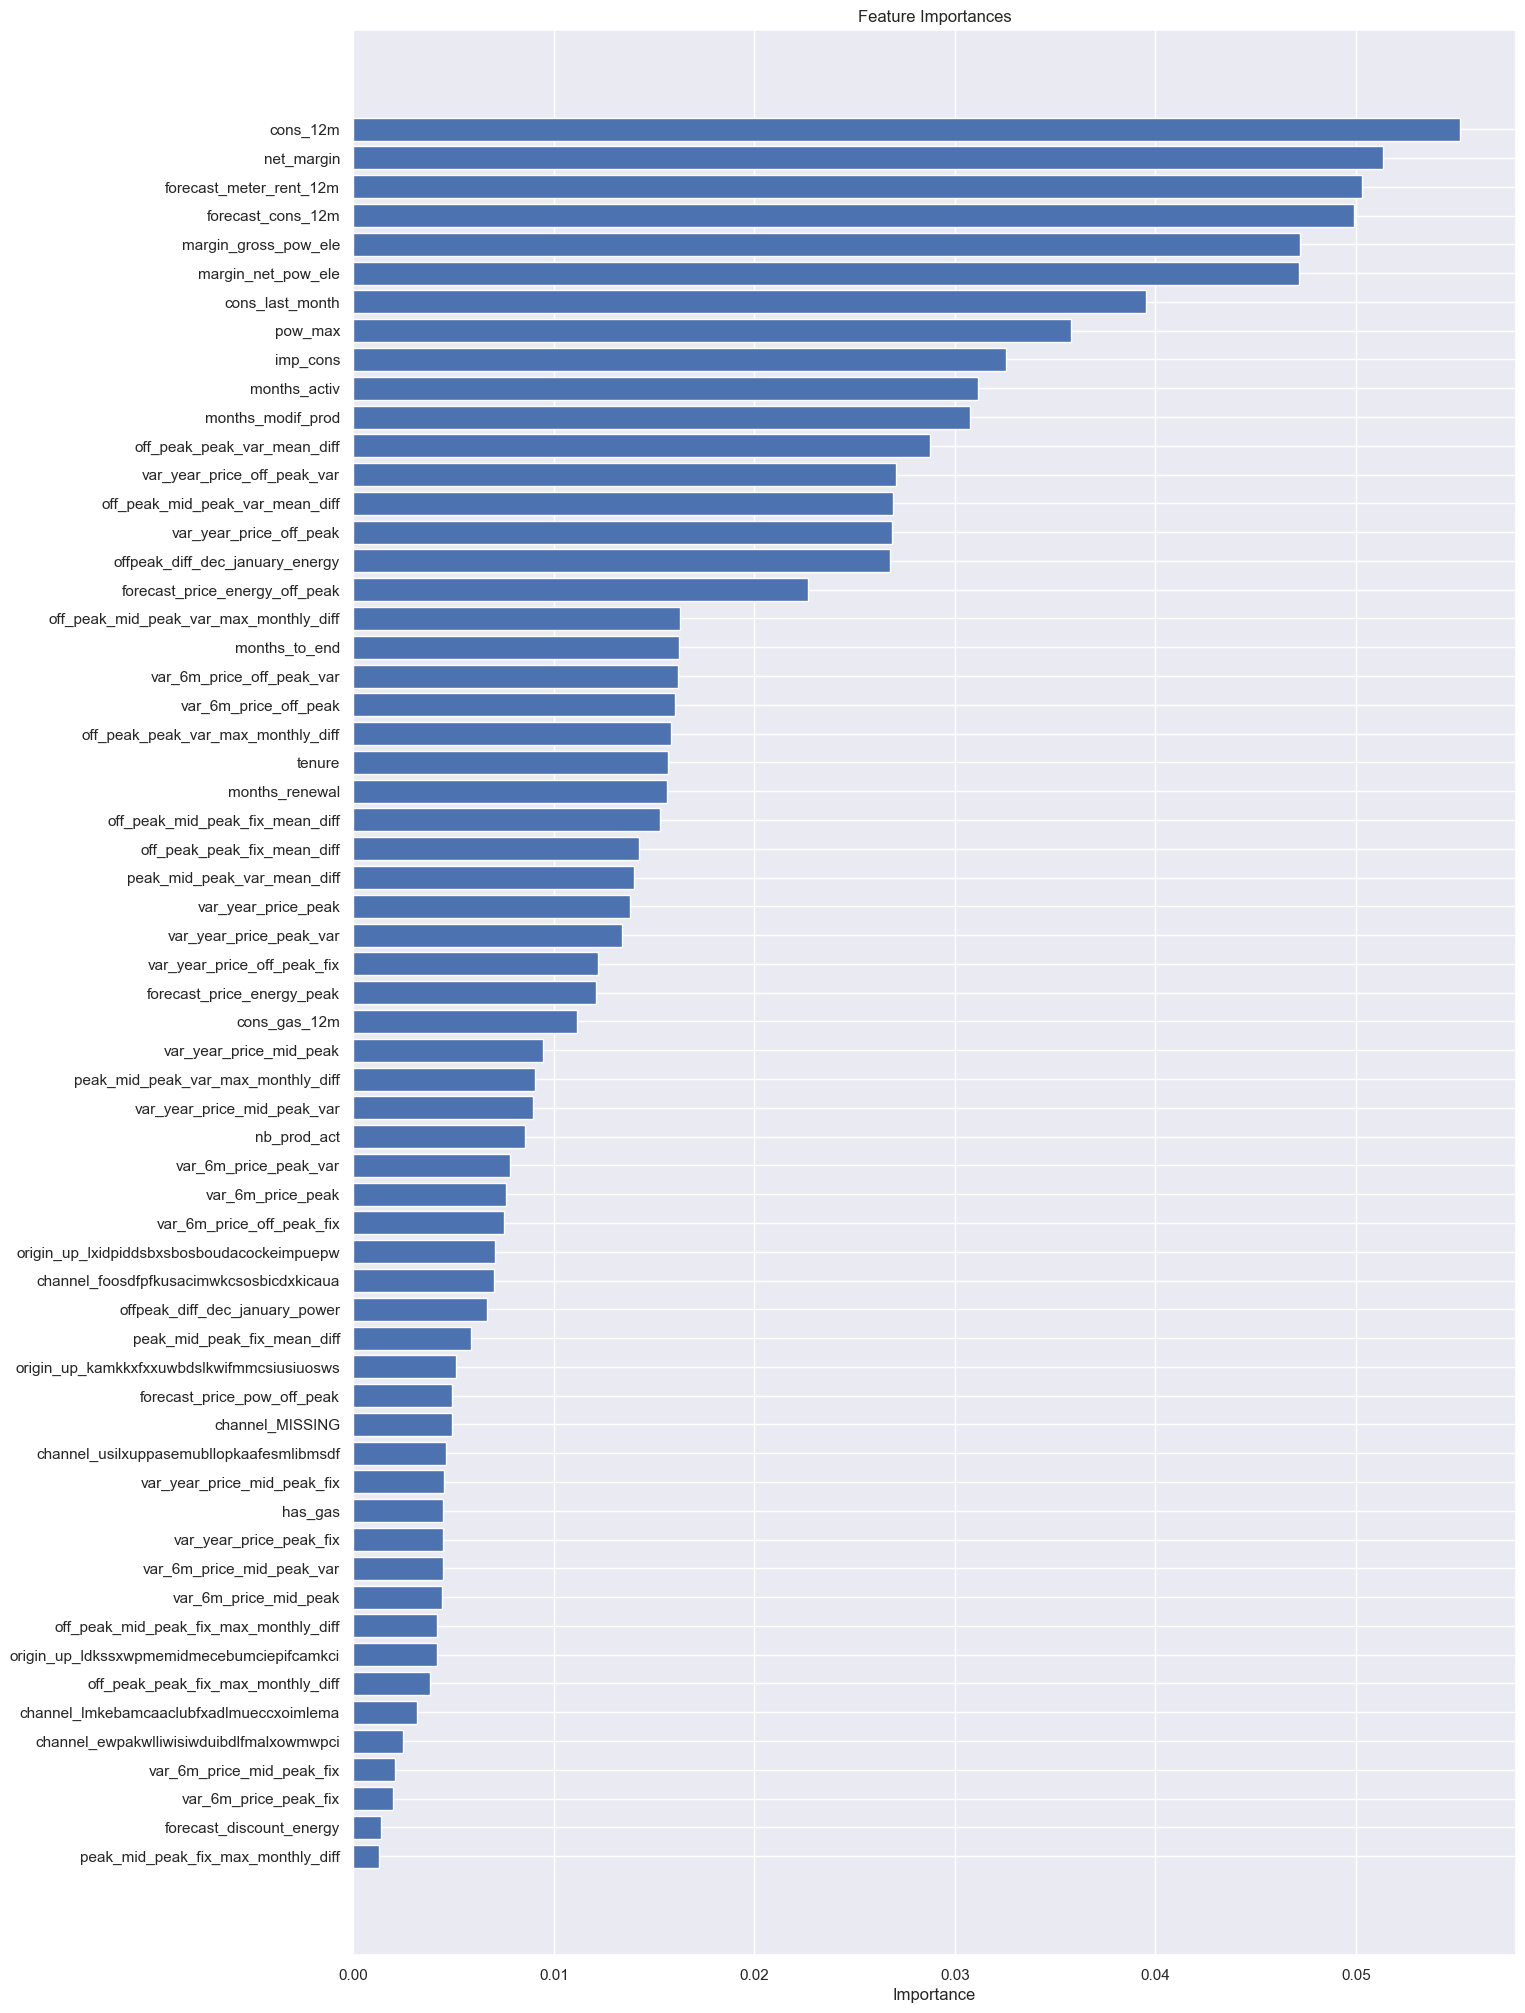

In [27]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


Feature importances provide insights into the significance of each feature within the predictive model. While various methods exist for calculating feature importance, in the case of a Random Forest classifier, we can extract feature importances using the built-in method associated with the trained model.

Specifically, in a Random Forest, feature importance reflects the number of times each feature is used for splitting across all the trees in the ensemble. By analyzing these importances, we gain valuable information about which features contribute most to the model's predictions.

Remember that feature engineering and parameter optimization play crucial roles in enhancing model performance. However, for now, let's focus on understanding the existing model through its feature importances.

Now, regarding your original hypothesis:

> Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, price sensitivity is not the primary driver of churn. While it contributes weakly, more experimentation and analysis are necessary to arrive at a conclusive result. Keep refining your model and exploring additional features to gain deeper insights! 🚀

In [28]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [29]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [31]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

# END 